<a href="https://colab.research.google.com/github/gowrisankar393/vaylen-transitlk/blob/Passenger-Incident-Detction/Objectdetection-YOLO8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os

base_path = "/content/drive/MyDrive/fightposes/Aggressive_Poses_Dataset"

print("Images:", len(os.listdir(os.path.join(base_path, "images"))))
print("Labels:", len(os.listdir(os.path.join(base_path, "labels"))))

Images: 103
Labels: 103


In [3]:
images = {f.replace(".jpg", "") for f in os.listdir(f"{base_path}/images")}
labels = {f.replace(".txt", "") for f in os.listdir(f"{base_path}/labels")}

print("Missing labels:", images - labels)
print("Extra labels:", labels - images)

Missing labels: set()
Extra labels: set()


(np.float64(-0.5), np.float64(783.5), np.float64(1167.5), np.float64(-0.5))

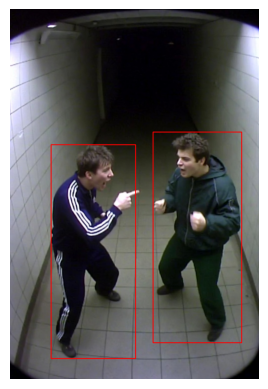

In [6]:
import cv2
import matplotlib.pyplot as plt

img_name = os.listdir(f"{base_path}/images")[0]

img_path = f"{base_path}/images/{img_name}"
lbl_path = f"{base_path}/labels/{img_name.replace('.jpg','.txt')}"

img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
h, w, _ = img.shape

with open(lbl_path) as f:
    for line in f:
        values = list(map(float, line.split()))
        cls, x, y, bw, bh = values[:5]  # ✅ take only bbox

        x1 = int((x - bw/2) * w)
        y1 = int((y - bh/2) * h)
        x2 = int((x + bw/2) * w)
        y2 = int((y + bh/2) * h)

        cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)

plt.imshow(img)
plt.axis("off")

In [7]:
import shutil
import random

random.seed(42)

output_dir = "/content/pose_split"
train_img = f"{output_dir}/train/images"
train_lbl = f"{output_dir}/train/labels"
val_img   = f"{output_dir}/val/images"
val_lbl   = f"{output_dir}/val/labels"

for d in [train_img, train_lbl, val_img, val_lbl]:
    os.makedirs(d, exist_ok=True)

image_files = [f for f in os.listdir(f"{base_path}/images") if f.endswith(".jpg")]
random.shuffle(image_files)

split_idx = int(0.8 * len(image_files))
train_files = image_files[:split_idx]
val_files   = image_files[split_idx:]

def copy_files(files, img_dst, lbl_dst):
    for img in files:
        shutil.copy(f"{base_path}/images/{img}", f"{img_dst}/{img}")
        lbl = img.replace(".jpg", ".txt")
        shutil.copy(f"{base_path}/labels/{lbl}", f"{lbl_dst}/{lbl}")

copy_files(train_files, train_img, train_lbl)
copy_files(val_files, val_img, val_lbl)

print("Split done!")
print("Train:", len(train_files))
print("Val:", len(val_files))

Split done!
Train: 82
Val: 21


In [8]:
import os
import cv2
import matplotlib.pyplot as plt

img_name = os.listdir(f"{base_path}/images")[0]

img_path = f"{base_path}/images/{img_name}"
lbl_path = f"{base_path}/labels/{img_name.replace('.jpg','.txt')}"

img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
h, w, _ = img.shape

with open(lbl_path) as f:
    for line in f:
        values = list(map(float, line.split()))
        cls, x, y, bw, bh = values[:5]  # ✅ ONLY bbox

        x1 = int((x - bw / 2) * w)
        y1 = int((y - bh / 2) * h)
        x2 = int((x + bw / 2) * w)
        y2 = int((y + bh / 2) * h)

        cv2

In [9]:
data_yaml = """
train: /content/pose_split/train/images
val: /content/pose_split/val/images

nc: 1
names: ['aggressive_pose']

kpt_shape: [17, 3]
"""

with open("/content/data.yaml", "w") as f:
    f.write(data_yaml)

print("data.yaml created")

data.yaml created


In [10]:
!pip install -q ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 19.1 MB/s eta 0:00:00


In [12]:
from ultralytics import YOLO

model = YOLO("yolov8n-pose.pt")

model.train(
    data="/content/data.yaml",
    epochs=5,
    imgsz=640,
    batch=8,        # lower batch for CPU
    device="cpu"    # ✅ FIX
)

Ultralytics 8.4.12 🚀 Python-3.12.12 torch-2.9.0+cpu CPU (Intel Xeon CPU @ 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=5, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n-pose.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plo

ultralytics.utils.metrics.PoseMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7879630902f0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(P)', 'F1-Confidence(P)', 'Precision-Confidence(P)', 'Recall-Confidence(P)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034, 

In [13]:
model.val()

Ultralytics 8.4.12 🚀 Python-3.12.12 torch-2.9.0+cpu CPU (Intel Xeon CPU @ 2.20GHz)
YOLOv8n-pose summary (fused): 82 layers, 3,289,964 parameters, 0 gradients, 9.2 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1877.3±456.2 MB/s, size: 198.1 KB)
val: Scanning /content/pose_split/val/labels.cache... 21 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 21/21 3.5Mit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 2/2 3.2s/it 6.4s
                   all         21         42          1          1      0.995      0.902      0.976      0.976      0.965      0.694
Speed: 1.7ms preprocess, 258.2ms inference, 0.0ms loss, 0.5ms postprocess per image
Results saved to /content/runs/pose/val


ultralytics.utils.metrics.PoseMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x78795b57da00>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(P)', 'F1-Confidence(P)', 'Precision-Confidence(P)', 'Recall-Confidence(P)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034, 

In [14]:
from ultralytics import YOLO

model = YOLO("runs/pose/train/weights/best.pt")  # path to best model

metrics = model.val(data="/content/data.yaml", device="cpu")

Ultralytics 8.4.12 🚀 Python-3.12.12 torch-2.9.0+cpu CPU (Intel Xeon CPU @ 2.20GHz)
YOLOv8n-pose summary (fused): 82 layers, 3,289,964 parameters, 0 gradients, 9.2 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2245.1±597.7 MB/s, size: 181.6 KB)
val: Scanning /content/pose_split/val/labels.cache... 21 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 21/21 3.5Mit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 2/2 2.8s/it 5.6s
                   all         21         42          1          1      0.995      0.902      0.976      0.976      0.965      0.694
Speed: 1.4ms preprocess, 246.3ms inference, 0.0ms loss, 0.5ms postprocess per image
Results saved to /content/runs/pose/val2



image 1/1 /content/pose_split/val/images/aggressive_pose_10.jpg: 640x448 2 aggressive_poses, 214.6ms
Speed: 4.3ms preprocess, 214.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 448)


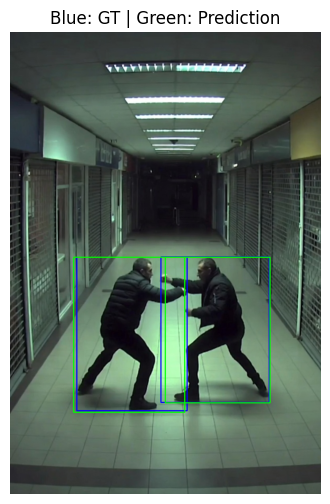


image 1/1 /content/pose_split/val/images/aggressive_pose_2.jpg: 640x448 2 aggressive_poses, 206.2ms
Speed: 4.5ms preprocess, 206.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


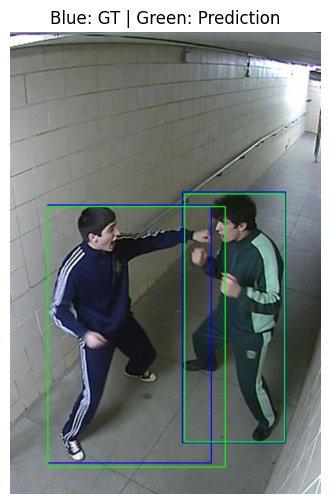


image 1/1 /content/pose_split/val/images/aggressive_pose_79.jpg: 640x448 2 aggressive_poses, 202.7ms
Speed: 9.0ms preprocess, 202.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)


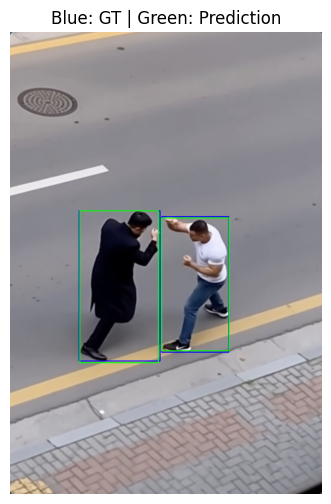


image 1/1 /content/pose_split/val/images/aggressive_pose_33.jpg: 640x448 2 aggressive_poses, 203.5ms
Speed: 4.8ms preprocess, 203.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


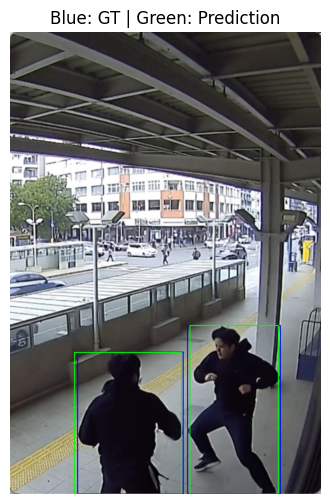


image 1/1 /content/pose_split/val/images/aggressive_pose_32.jpg: 640x448 2 aggressive_poses, 231.0ms
Speed: 5.9ms preprocess, 231.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


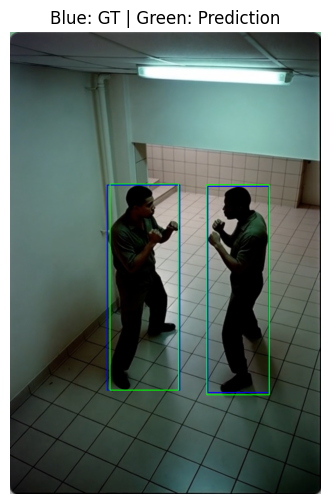

In [15]:
import os
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO

# Load the trained model
model = YOLO("runs/pose/train/weights/best.pt")  # path to your trained model

# Validation images folder
val_img_folder = "/content/pose_split/val/images"
val_lbl_folder = "/content/pose_split/val/labels"

# Get 5 random validation images
val_images = [f for f in os.listdir(val_img_folder) if f.endswith(".jpg")]
import random
random.seed(42)
sample_images = random.sample(val_images, 5)

# Loop through the sample images
for img_name in sample_images:
    img_path = os.path.join(val_img_folder, img_name)
    lbl_path = os.path.join(val_lbl_folder, img_name.replace(".jpg", ".txt"))

    # Read image
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    h, w, _ = img.shape

    # Draw ground-truth labels
    with open(lbl_path) as f:
        for line in f:
            values = list(map(float, line.split()))
            cls, x, y, bw, bh = values[:5]
            x1 = int((x - bw / 2) * w)
            y1 = int((y - bh / 2) * h)
            x2 = int((x + bw / 2) * w)
            y2 = int((y + bh / 2) * h)
            # Ground-truth bbox in blue
            cv2.rectangle(img, (x1, y1), (x2, y2), (0, 0, 255), 2)

    # Run prediction on the same image
    results = model.predict(source=img_path, conf=0.25)

    # Draw predicted boxes/keypoints in green
    for result in results:
        boxes = result.boxes.xyxy.cpu().numpy() if hasattr(result.boxes, 'xyxy') else []
        for box in boxes:
            x1, y1, x2, y2 = map(int, box)
            cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)

    # Show the image
    plt.figure(figsize=(8, 6))
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Blue: GT | Green: Prediction")
    plt.show()